In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Kununu Scrape
The following is the scraping of the kununu review data. Pulls individual reviews and then parses the contents for tables that match review category names. Interested in the structured integer values, not the unstructured comments. 

In [3]:
def k_pull(bis_str):
    
    main =[] 		#stores page data to compare to alt
    alt=[0]			#stores page data to compare to main, initailized as [0] to prevent the program from prematurely ending
    page_turner = 1  #tracks current page 
    line_count = 1
    altr = 1 		#tracks where to hold page info
    full = {}
    while True:
        
        if alt == 0:
            del alt[0]

        pagepull = requests.get('https://www.kununu.com/us/{}/reviews/{}'.format(bis_str, page_turner))
        tempSoup = BeautifulSoup(pagepull.content, 'lxml')
        stew = tempSoup.find_all("article")
        if altr == 1:
            main = stew
        elif altr == -1:
            alt = stew
        else:
            print('Error with Alternator')
        if alt == main: 
            print('Scrape Complete')
            break    
        
        
        bowl, line_count = data_soup(stew, line_count, bis_str)
        full.update(bowl)
        altr *= -1
        print('Page %d complete' % page_turner)#used to keep track of longer scrapes
        page_turner += 1
        
    return full

In [4]:
split_list = ['Company Culture', 'Support from management', 'Teamwork', 'Freedom to work independently','Internal Communication',
              'Gender Equality','Attitude towards older colleagues','Career Development', 'Overall compensation for your work','Office / Work Environment',
              'Environmental Friendliness','Work-Life Balance','Company Image','Job Security','Handicapped Accessibility',
              'Workplace Safety', 'Challenging Work', 'Inclusive / Diverse', 'City']

In [5]:
def data_soup(stew, line_count, name_str): # Read Line, if match with string then next string record number only
    hold_dic ={}
    is_city = False
    for review in stew:
        hold_action = False
        hold_list = []
        for line in review.stripped_strings:

            if hold_action == True: #Line After Listed action
                hold_action = False
                if is_city == False:
                    try:
                        float(line)
                    except:
                        continue
                else:
                    pass
                is_city = False
                hold_list += [line]

            if line in split_list:
                hold_action = True
                if line == 'City': is_city = True
        hold_dic[str(name_str +' '+ str(line_count))] = hold_list
        line_count +=1 #init outside method
    return hold_dic, line_count

In [6]:
k_list = ['oracle-usa',  'dell-usa' ]

In [7]:
k_scraps = {}
for k in k_list:
    scrapes = k_pull(k)
    k_scraps.update(scrapes)

Page 1 complete
Page 2 complete
Page 3 complete
Page 4 complete
Page 5 complete
Page 6 complete
Page 7 complete
Page 8 complete
Page 9 complete
Page 10 complete
Page 11 complete
Page 12 complete
Page 13 complete
Page 14 complete
Page 15 complete
Page 16 complete
Page 17 complete
Page 18 complete
Page 19 complete
Page 20 complete
Page 21 complete
Page 22 complete
Page 23 complete
Page 24 complete
Page 25 complete
Page 26 complete
Page 27 complete
Page 28 complete
Page 29 complete
Page 30 complete
Page 31 complete
Page 32 complete
Page 33 complete
Page 34 complete
Page 35 complete
Page 36 complete
Page 37 complete
Page 38 complete
Page 39 complete
Page 40 complete
Page 41 complete
Page 42 complete
Page 43 complete
Scrape Complete
Page 1 complete
Page 2 complete
Page 3 complete
Page 4 complete
Page 5 complete
Page 6 complete
Page 7 complete
Page 8 complete
Page 9 complete
Page 10 complete
Page 11 complete
Page 12 complete
Page 13 complete
Page 14 complete
Page 15 complete
Page 16 complete

In [8]:
k_col = {0:'Company Culture', 1:'Support from management', 2:'Teamwork', 3:'Freedom to work independently', 4:'Internal Communication',
              5:'Gender Equality', 6:'Attitude towards older colleagues', 7:'Career Development', 8:'Overall compensation for your work', 9:'Office / Work Environment',
              10:'Environmental Friendliness', 11:'Work-Life Balance', 12:'Company Image', 13:'Job Security', 14:'Handicapped Accessibility',
              15:'Workplace Safety', 16:'Challenging Work', 17:'Inclusive / Diverse', 18:'City'}

In [9]:
base = pd.DataFrame.from_dict(k_scraps, orient = 'index')

In [10]:
base.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
oracle-usa 1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,Charlotte,Charlotte,None,None
oracle-usa 2,5.00,4.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00,5.00,...,2.00,5.00,4.00,5.00,5.00,4.00,5.00,Chicago,Chicago,None
oracle-usa 3,4.00,4.00,5.00,5.00,4.00,4.00,3.00,4.00,3.00,5.00,...,3.00,4.00,2.00,5.00,5.00,4.00,5.00,Broomfield,Broomfield,None
oracle-usa 4,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,...,5.00,4.00,5.00,4.00,4.00,4.00,4.00,Seattle Heights,Seattle Heights,None
oracle-usa 5,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,5.00,1.00,1.00,1.00,1.00,1.00,1.00,Orlando,Orlando,None


### At this point, there are visibly some issues with some of the scraped data. Droping data that does not conform to expectation will proceed

In [11]:
base.shape

(880, 21)

In [12]:
#Drop Rows with unexpected inconsistancies
drop2 = base.dropna(subset=[19])
drop3 = drop2.drop(drop2.loc[drop2[20].notna()==True].index)
drop4 = drop3.drop([19, 20], axis = 1)

In [13]:
drop4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
oracle-usa 2,5.00,4.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00,2.00,5.00,4.00,5.00,5.00,4.00,5.00,Chicago
oracle-usa 3,4.00,4.00,5.00,5.00,4.00,4.00,3.00,4.00,3.00,5.00,5.00,3.00,4.00,2.00,5.00,5.00,4.00,5.00,Broomfield
oracle-usa 4,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,5.00,4.00,4.00,4.00,4.00,Seattle Heights
oracle-usa 5,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,Orlando
oracle-usa 6,5.00,3.00,5.00,5.00,4.00,5.00,5.00,4.00,3.00,5.00,5.00,4.00,4.00,5.00,5.00,5.00,4.00,5.00,Redwood Shores


### Review data is now in the expected format. Next is to set the ratings to a numerical format rather than an object

In [14]:
drop4.iloc[:,0:18] = drop4.iloc[:,0:18].applymap(lambda x: int(str(x)[0]))

In [15]:
drop4 = drop4.infer_objects()

### Next is to make the city string uniform in nature

In [16]:
drop4 = drop4.rename(columns = k_col)

In [17]:
drop4['City'] = drop4['City'].map(lambda x: str(x).strip().title())

In [18]:
drop4['Total Rating'] = drop4.iloc[:,0:18].sum(axis = 1).div(18)

In [19]:
rep_dic = {r'Bedford.*':'Bedford', r'Burlington.*': 'Burlington', r'Hopkington.*':'Hopkinton', r'Hopkinton.*':'Hopkinton', r'Oklahoma City' :'Oklahoma City', r'Rocklin.*':'Rocklin', 'Sf':'San Francisco', r'Winston.Salem.*':'Winston-Salem', r'New York.*':'New York'}

In [20]:
drop4['City'] = drop4.replace(rep_dic,regex=True)['City']

### Next turn the index column into company and reset the index

In [21]:
drop4.reset_index(inplace = True)

In [22]:
drop4.rename(columns = {'index': 'Company'}, inplace = True)

In [23]:
drop4.replace({r'dell.*':'Dell', r'oracle.*':'Oracle'}, regex = True, inplace = True)

In [24]:
drop4['Company'] = drop4['Company'].map(lambda x: str(x).strip())

# Locations
These are where you can find the office locations. 

Oracle will be an automated scrape, Dell has been transcribed manually

## Oracle 

https://www.oracle.com/corporate/contact/field-offices.html

## Dell

https://www.delltechnologies.com/en-us/what-we-do/customer-engagement-programs/locations.htm


In [25]:
delphi = requests.get('https://www.oracle.com/corporate/contact/field-offices.html')
oracleSoup = BeautifulSoup(delphi.content, 'lxml')

In [26]:
oracleStew = oracleSoup.find_all('p')

In [27]:
delphi_locs = []
hodl= ''
for line in oracleStew[3:-4]:
    hodl = ''
    for row in line.stripped_strings:
        #Skips Extra Data
        if 'Oracle Corporation'         == row: continue
        if '+1.'                        in row: continue
        if 'Security Operations Center' == row: continue
        if 'Redwood Shores'             == row: continue
        if 'Perimeter Park'             == row: continue
        if 'Phone'                      in row: continue
        if 'Fax'                        in row: continue
        
        if hodl != '': hodl += ','
        hodl += row
        hodl += ' '
    delphi_locs += [hodl]
        

In [28]:
dell_locs=[
         '10 S Riverside Plaza, Chicago, IL 60606',
         '1 Dell Parkway, Nashville, TN 37217',
         '1 Penn Plaza, New York, NY 10121',
         '8444 Westpark Dr, McLean, VA 22102',
         '176 South St, Hopkinton, MA 01748',
         'R1 Dell Way, Round Rock, TX 78682',
         '5455 Great America Pkwy, Santa Clara, CA 95054']

### Here starts the Bing Maps API Process. Companies have been called seperatly to allow for possible adaptability in further iterations.

### Error counter was added to Oracle's portion due to failure rate. 

In [29]:
# The code was removed by Watson Studio for sharing.

Bing Credentials Loaded


In [30]:
#url_string = 'http://dev.virtualearth.net/REST/v1/Locations/US/{}/{}/{}/{}?includeNeighborhood={}&maxResults={}&key={}'.format(adminDistrict, postalCode, locality, addressLine, includeNeighborhood, maxResults, BingMapsAPIKey)

In [31]:
coord_list = {}
passC = 0
for place in dell_locs:
    parts = place.split(',')
    adminDistrict = parts[-1].split()[0]
    postalCode =    parts[-1].split()[1]
    locality =      parts[1]
    addressLine =   parts[0]
    url_string = 'http://dev.virtualearth.net/REST/v1/Locations/US/{}/{}/{}/{}?includeNeighborhood={}&maxResults={}&key={}'.format(adminDistrict, postalCode, locality, addressLine, includeNeighborhood, maxResults, BingMapsAPIKey)
    coord_pull = requests.get(url_string)
    try:
        coord_values = coord_pull.json()['resourceSets'][0]['resources'][0]['point']['coordinates']
    except:
        print('Error Processing Place: '+ place )
        continue
    coord_list[place] = coord_values
    passC+=1
    
print('Dell Geocoded')

Dell Geocoded


In [32]:
fail_count = 0
for place in delphi_locs:
    parts = place.rsplit(',')
    adminDistrict = parts[-1].split()[0]
    postalCode =    parts[-1].split()[1]
    locality =      parts[-2]
    addressLine =   parts[0]
    url_string = 'http://dev.virtualearth.net/REST/v1/Locations/US/{}/{}/{}/{}?includeNeighborhood={}&maxResults={}&key={}'.format(adminDistrict, postalCode, locality, addressLine, includeNeighborhood, maxResults, BingMapsAPIKey)
    coord_pull = requests.get(url_string)
    try:
        coord_values = coord_pull.json()['resourceSets'][0]['resources'][0]['point']['coordinates']
    except:
        print('Error Processing Place: '+ addressLine+locality+adminDistrict+postalCode )
        print(coord_pull)
        fail_count += 1
        continue
    coord_list[place] = coord_values
    
print('Oracle Geocoded')
print('Fail Count:'+str(fail_count))

Error Processing Place: 2501 Technology Circle BentonvilleAR72712
<Response [404]>
Error Processing Place: 1365 N Scottsdale Road ScottsdaleAZ85257
<Response [404]>
Error Processing Place: 9070 South Rita Rd. TucsonAZ85747
<Response [404]>
Error Processing Place: 440 East Huntington Drive ArcadiaCA91006
<Response [404]>
Error Processing Place: 5750 Hannum Avenue Culver CityCA90230
<Response [404]>
Error Processing Place: 200 N. Sepulveda Blvd. El SegundoCA90245
<Response [404]>
Error Processing Place: 500 Oracle Parkway Redwood ShoresCA94065
<Response [404]>
Error Processing Place: 5805 Owens Drive PleasantonCA94588
<Response [404]>
Error Processing Place: 1001 Sunset Boulevard RocklinCA95765
<Response [404]>
Error Processing Place: 1100 Grundy Lane San BrunoCalifornia94066
<Response [404]>
Error Processing Place: Eastgate Technology Park San DiegoCA92121
<Response [404]>
Error Processing Place: 475 Sansome Street San FranciscoCA94111
<Response [404]>
Error Processing Place: 488 Almade

In [33]:
coord_list

{'10 S Riverside Plaza, Chicago, IL 60606': [41.881193, -87.63914],
 '1 Dell Parkway, Nashville, TN 37217': [36.105047, -86.678859],
 '1 Penn Plaza, New York, NY 10121': [40.751119, -73.99245],
 '8444 Westpark Dr, McLean, VA 22102': [38.925339, -77.236297],
 '176 South St, Hopkinton, MA 01748': [42.19618, -71.54095],
 'R1 Dell Way, Round Rock, TX 78682': [30.4864250347678, -97.6703700151243],
 '5455 Great America Pkwy, Santa Clara, CA 95054': [37.41156, -121.9764],
 '17901 Von Karman Avenue, Suite 800 ,Irvine, CA 92614 ': [33.683203,
  -117.849701],
 '15 North Main, Suite 100 ,West Hartford, CT 06107 ': [41.763029, -72.742196],
 '2311 Wilson Boulevard, 7th and 8th floors ,Arlington, VA 22201 ': [38.89113,
  -77.08665]}

### Start of the Foursquare API Process directly turns the data into venue by ratio and contains venue count and radius used. 

In [34]:
# The code was removed by Watson Studio for sharing.

In [35]:
#pulls category type
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [36]:
#cleans up the individual requests FOR USE IN four_pull
def ven_jdb(rawapi):
    venues = rawapi['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    return (nearby_venues)

In [37]:
#combines Api Call and Pulling Relavent Data into a Dictionary
def four_pull(frame, radius = 500):
    postal_ven = {}
    for row in coord_list.keys():
        llb = coord_list[row]
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit=100'.format(CLIENT_ID, CLIENT_SECRET, llb[0], llb[1], VERSION, radius)
        fs_return = requests.get(url).json()
        try:
            postal_ven[row] = ven_jdb(fs_return)
        except Exception as e:
            print('Issue pulling Data from ' + str(row) +': '  + str(e))
    return postal_ven

In [38]:
#take Venue data as Dictionary and turns it into ratio by Venue Type and return as Dictionary
def ratio_ven(post_dic):
    key_frame = {}
    for key in post_dic.keys():
        holden = post_dic[key].groupby(['categories']).count()
        holden = holden.T
        holden = holden/((post_dic[key].shape[0]))
        holden['Count'] = post_dic[key].shape[0]
        key_frame[key] = holden
        
    
    return key_frame

In [39]:
def add_radii(keyed_frames, radius):
    for key in keyed_frames.keys():
        keyed_frames[key]['Radius'] = radius
        keyed_frames[key] = keyed_frames[key].drop(['lat', 'lng'])
        
    return keyed_frames

### Set up to get relavent foursquare data by radius

In [40]:
api_pull = four_pull(coord_list, 250)
ratio_frame_250 = ratio_ven(api_pull)
ratio_frame_250 = add_radii(ratio_frame_250, 250)

In [41]:
api_pull = four_pull(coord_list, 500)
ratio_frame_500 = ratio_ven(api_pull)
ratio_frame_500 = add_radii(ratio_frame_500, 500)

In [42]:
api_pull = four_pull(coord_list, 1000)
ratio_frame_1k = ratio_ven(api_pull)
ratio_frame_1k = add_radii(ratio_frame_1k, 1000)

In [43]:
api_pull = four_pull(coord_list, 10000)
ratio_frame_10k = ratio_ven(api_pull)
ratio_frame_10k = add_radii(ratio_frame_10k, 10000)

In [44]:
api_pull = four_pull(coord_list, 100000)
ratio_frame_100k = ratio_ven(api_pull)
ratio_frame_100k = add_radii(ratio_frame_100k, 10000)

In [45]:
for key in ratio_frame_500.keys():
    print(key)

10 S Riverside Plaza, Chicago, IL 60606
1 Dell Parkway, Nashville, TN 37217
1 Penn Plaza, New York, NY 10121
8444 Westpark Dr, McLean, VA 22102
176 South St, Hopkinton, MA 01748
R1 Dell Way, Round Rock, TX 78682
5455 Great America Pkwy, Santa Clara, CA 95054
17901 Von Karman Avenue, Suite 800 ,Irvine, CA 92614 
15 North Main, Suite 100 ,West Hartford, CT 06107 
2311 Wilson Boulevard, 7th and 8th floors ,Arlington, VA 22201 


In [46]:
ratio_frame_1k['1 Dell Parkway, Nashville, TN 37217']['Count'].iat[0]

9

In [47]:
loc_max ={}
for key in ratio_frame_500.keys():
    if ratio_frame_100k[key]['Count'].iat[0] != 100:
        loc_max[key] = ratio_frame_100k[key]
    elif ratio_frame_10k[key]['Count'].iat[0] != 100:
        loc_max[key] = ratio_frame_10k[key]
    elif ratio_frame_1k[key]['Count'].iat[0] != 100:
        loc_max[key] = ratio_frame_1k[key]
    elif ratio_frame_500[key]['Count'].iat[0] != 100:
        loc_max[key] = ratio_frame_500[key]
    else:
        loc_max[key] = ratio_frame_250[key]
    

In [48]:
#take the Foursquare data in the dictionary and organize it into a dataframe
key_ring = list(loc_max.keys())
key = key_ring.pop()
test = pd.DataFrame(data= loc_max[key])
test = test.reset_index(drop = True)
test.loc[0,'Address']=key
loc_loc = 1
for key in key_ring:
    test = test.append(loc_max[key],ignore_index = True)
    test.loc[loc_loc,'Address']=key
    loc_loc += 1

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [49]:
test.columns

Index(['Accessories Store', 'Address', 'Airport Terminal',
       'American Restaurant', 'Arts & Crafts Store', 'Asian Restaurant',
       'Athletics & Sports', 'Auditorium', 'Automotive Shop', 'BBQ Joint',
       ...
       'Tunnel', 'Used Bookstore', 'Vegetarian / Vegan Restaurant',
       'Video Store', 'Vietnamese Restaurant', 'Wine Bar', 'Wine Shop',
       'Wings Joint', 'Women's Store', 'Yoga Studio'],
      dtype='object', length=166)

### Fill in the the na venue data as 0s  and add Company data

In [50]:
 test = test.fillna(0)

In [51]:
def del_ora(x):
    if x in dell_locs: return('Dell')
    else: return('Oracle')
        

In [52]:
test['Company'] = test['Address'].map(lambda x: del_ora(x))

In [53]:
test.loc[:,['Company','Address']]

,Company,Address
0,Oracle,"2311 Wilson Boulevard, 7th and 8th floors ,Arl..."
1,Dell,"10 S Riverside Plaza, Chicago, IL 60606"
2,Dell,"1 Dell Parkway, Nashville, TN 37217"
3,Dell,"1 Penn Plaza, New York, NY 10121"
4,Dell,"8444 Westpark Dr, McLean, VA 22102"
5,Dell,"176 South St, Hopkinton, MA 01748"
6,Dell,"R1 Dell Way, Round Rock, TX 78682"
7,Dell,"5455 Great America Pkwy, Santa Clara, CA 95054"
8,Oracle,"17901 Von Karman Avenue, Suite 800 ,Irvine, CA..."
9,Oracle,"15 North Main, Suite 100 ,West Hartford, CT 06..."


In [54]:
new = test['Address'].str.rsplit(pat = ',', n=2, expand = True)
new['City'] = new[1]
new.head()

,0,1,2,City
0,"2311 Wilson Boulevard, 7th and 8th floors",Arlington,VA 22201,Arlington
1,10 S Riverside Plaza,Chicago,IL 60606,Chicago
2,1 Dell Parkway,Nashville,TN 37217,Nashville
3,1 Penn Plaza,New York,NY 10121,New York
4,8444 Westpark Dr,McLean,VA 22102,McLean


In [55]:
test = test.join(new['City'])

In [56]:
test['City'] = test['City'].map(lambda x: str(x).strip())

   ## Reccomended save test and drop4 dataframes to save from rescraping data and calls each time
   
   ### aggregate is computed and joined on company as an option to fill missing venue data

In [57]:
comp_agg = test.groupby(test['Company'])

In [58]:
comp_agg.mean()

,Accessories Store,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Automotive Shop,BBQ Joint,Bagel Shop,...,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
Company,,,,,,,,,,,,,,,,,,,,,
Dell,0.000000,0.015873,0.013786,0.003808,0.015873,0.010453,0.003484,0.005102,0.024908,0.002304,...,0.015873,0.001504,0.004608,0.003008,0.006606,0.003008,0.015873,0.002304,0.001504,0.00000
Oracle,0.005128,0.000000,0.024644,0.000000,0.009259,0.000000,0.000000,0.000000,0.005128,0.004695,...,0.000000,0.000000,0.005128,0.000000,0.004695,0.005128,0.000000,0.000000,0.000000,0.00939


In [59]:
pre_combo = drop4.merge(test, how = 'outer')  #use for unassumed/non-infered venue data data

In [60]:
combo_rate = drop4.merge(test, how = 'outer') #use for assumed/infered venue data

In [61]:
combo_rate.update(comp_agg.mean().reset_index(), overwrite = False)

In [62]:
combo_rate =drop4.join(comp_agg.mean(), how = 'left', on = ['Company'])

In [63]:
combo_rate.update(test.drop(['Company'], axis = 1))

In [64]:
combo_rate.head()

,Company,Company Culture,Support from management,Teamwork,Freedom to work independently,Internal Communication,Gender Equality,Attitude towards older colleagues,Career Development,Overall compensation for your work,...,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Oracle,5,4,4,5,4,5,4,5,4,...,0.000000,0.0,0.000000,0.0,0.014085,0.0,0.000000,0.000000,0.0,0.028169
1,Oracle,4,4,5,5,4,4,3,4,3,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,Oracle,4,5,4,4,4,4,4,4,5,...,0.111111,0.0,0.000000,0.0,0.000000,0.0,0.111111,0.000000,0.0,0.000000
3,Oracle,1,1,1,1,1,1,1,1,1,...,0.000000,0.0,0.032258,0.0,0.000000,0.0,0.000000,0.016129,0.0,0.000000
4,Oracle,5,3,5,5,4,5,5,4,3,...,0.000000,0.0,0.000000,0.0,0.035714,0.0,0.000000,0.000000,0.0,0.000000


In [65]:
combo_rate.shape

(663, 186)

In [66]:
combo_corr = combo_rate.corr()

### Following the joining the sets, setting up columns to make upcoming data analysis more readable

In [67]:
rate_cols = list(drop4.columns)
rate_cols.remove('Company')
rate_cols.remove('City')
rate_cols

['Company Culture',
 'Support from management',
 'Teamwork',
 'Freedom to work independently',
 'Internal Communication',
 'Gender Equality',
 'Attitude towards older colleagues',
 'Career Development',
 'Overall compensation for your work',
 'Office / Work Environment',
 'Environmental Friendliness',
 'Work-Life Balance',
 'Company Image',
 'Job Security',
 'Handicapped Accessibility',
 'Workplace Safety',
 'Challenging Work',
 'Inclusive / Diverse',
 'Total Rating']

In [68]:
venue_cols = list(test.columns)
venue_cols.remove('Company')
venue_cols.remove('City')
venue_cols.remove('Address')
venue_cols

['Accessories Store',
 'Airport Terminal',
 'American Restaurant',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auditorium',
 'Automotive Shop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Basketball Stadium',
 'Beach',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bookstore',
 'Boutique',
 'Breakfast Spot',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Chinese Restaurant',
 'Church',
 'Churrascaria',
 'Clothing Store',
 'Coffee Shop',
 'College Theater',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Count',
 'Cupcake Shop',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Discount Store',
 'Dive Bar',
 'Dog Run',
 'Donut Shop',
 'Electronics Store',
 'Falafel Restaurant',
 'Farmers Market',
 'Fast Food Restaurant',
 'Fish & Chips Shop',
 'Food & Drink Shop',
 'Food Court',
 'Food Stand'

# After this point the mojority of what occurs is data analysis

### Use correlation statistics to gain insights on the data, as well as testing for significance (0.05 < p as baseline for significance)

In [69]:
work_corr = combo_corr.loc[rate_cols, venue_cols]
work_corr

,Accessories Store,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Automotive Shop,BBQ Joint,Bagel Shop,...,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
Company Culture,-0.059889,0.054378,-0.058281,0.036780,0.049853,0.040465,0.040465,0.068290,0.049230,-0.067926,...,0.054378,0.068290,-0.095516,0.068290,0.084785,-0.029511,0.054378,0.012639,0.068290,-0.046755
Support from management,0.030068,0.002224,0.029064,-0.036276,0.030554,-0.049445,-0.049445,-0.023611,-0.007701,-0.004688,...,0.002224,-0.010693,-0.038035,-0.010693,-0.011569,0.043317,0.002224,-0.049445,-0.010693,0.023971
Teamwork,-0.016711,0.027945,-0.009534,0.000953,0.032144,-0.001856,-0.001856,0.042845,0.024315,-0.055808,...,0.027945,0.027945,-0.067119,0.027945,0.053672,0.002504,0.027945,-0.016756,0.027945,-0.023744
Freedom to work independently,0.008940,-0.006048,0.007907,-0.028285,-0.002211,-0.020532,-0.020532,0.008436,-0.011242,-0.030312,...,-0.006048,0.008436,-0.080738,0.008436,0.031595,0.026910,-0.006048,-0.049500,0.008436,0.008940
Internal Communication,-0.039545,0.047943,-0.032370,0.017961,0.051360,0.033900,0.033900,0.047943,0.045692,-0.061937,...,0.047943,0.033900,-0.068123,0.033900,0.042766,-0.033008,0.047943,0.005813,0.033900,-0.039545
Gender Equality,-0.000711,-0.003550,-0.007616,-0.025933,0.005750,-0.018234,-0.018234,0.011134,-0.012924,-0.021402,...,-0.003550,0.011134,-0.096407,0.011134,0.043641,0.012120,-0.003550,-0.047602,0.011134,0.013151
Attitude towards older colleagues,-0.022583,0.024445,-0.028168,-0.000621,0.032621,0.010657,0.010657,0.038233,0.016689,-0.042911,...,0.024445,0.024445,-0.079283,0.024445,0.054983,-0.012707,0.024445,-0.016919,0.024445,-0.016075
Career Development,-0.041675,0.043472,-0.039094,0.020840,0.052618,0.004044,0.004044,0.043472,0.034930,-0.035523,...,0.043472,0.043472,-0.075945,0.043472,0.063587,-0.025427,0.043472,0.004044,0.043472,-0.023064
Overall compensation for your work,-0.054907,0.080553,-0.055894,0.048746,0.092680,0.023248,0.023248,0.051900,0.070123,-0.072039,...,0.080553,0.080553,-0.064305,0.080553,0.051137,-0.005380,0.080553,0.023248,0.080553,-0.054907
Office / Work Environment,0.096112,-0.083096,0.093639,-0.110322,-0.054191,-0.097694,-0.097694,-0.068498,-0.091307,0.046830,...,-0.083096,-0.068498,-0.059411,-0.068498,-0.014405,0.097005,-0.083096,-0.126890,-0.068498,0.096112


In [70]:
work_t = (work_corr*((combo_rate.shape[0]-2)**0.5))/((1-(work_corr**2))**0.5) #T value

In [71]:
work_sign = work_corr.where(abs(work_t)>1.98 ).dropna(how = 'all').dropna(how = 'all', axis = 1) # significant value masked set

In [72]:
work_sign

,Accessories Store,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bakery,Bank,...,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
Company Culture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.095516,NaN,0.084785,NaN,NaN,NaN,NaN,NaN
Teamwork,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Freedom to work independently,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.080738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender Equality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.096407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attitude towards older colleagues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.079283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall compensation for your work,NaN,0.080553,NaN,NaN,0.09268,NaN,NaN,NaN,NaN,NaN,...,0.080553,0.080553,NaN,0.080553,NaN,NaN,0.080553,NaN,0.080553,NaN
Office / Work Environment,0.096112,-0.083096,0.093639,-0.110322,NaN,-0.097694,-0.097694,-0.091307,0.098027,0.096112,...,-0.083096,NaN,NaN,NaN,NaN,0.097005,-0.083096,-0.12689,NaN,0.096112
Job Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.081648,NaN,NaN,NaN,NaN
Handicapped Accessibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.082372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workplace Safety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.097367,NaN,NaN,NaN,NaN,-0.09021,NaN,NaN


In [73]:
work_sign['Vegetarian / Vegan Restaurant'].dropna() #all significant correlations for Vegan/Veggie type food places

Company Culture                     -0.095516
Freedom to work independently       -0.080738
Gender Equality                     -0.096407
Attitude towards older colleagues   -0.079283
Handicapped Accessibility           -0.082372
Workplace Safety                    -0.097367
Challenging Work                    -0.104526
Total Rating                        -0.080322
Name: Vegetarian / Vegan Restaurant, dtype: float64

### Checking all interactions for level of correlations

In [74]:
(abs(work_corr) > 0.8).any().any()

False

In [75]:
(abs(work_corr) > 0.7).any().any()

False

In [76]:
(abs(work_corr) > 0.6).any().any()

False

In [77]:
(abs(work_corr) > 0.5).any().any()

False

In [78]:
(abs(work_corr) > 0.2).any().any()

False

In [79]:
(abs(work_corr) > 0.1).any().any()

True

In [80]:
work_corr.where(abs(work_corr) > 0.1).max().dropna(how='all') # All correlations greater than 0.1

Arts & Crafts Store             -0.110322
Basketball Stadium              -0.126890
Breakfast Spot                  -0.109283
Bubble Tea Shop                  0.100814
Church                          -0.126890
College Theater                 -0.126890
Dance Studio                    -0.126890
Deli / Bodega                   -0.106978
Fried Chicken Joint              0.101126
Greek Restaurant                 0.101126
Health & Beauty Service          0.102485
Indian Restaurant                0.104004
Jewelry Store                    0.100814
Liquor Store                     0.100814
Lounge                          -0.126890
Martial Arts Dojo               -0.126890
Men's Store                     -0.126890
Mexican Restaurant               0.120422
Middle Eastern Restaurant        0.101373
Miscellaneous Shop               0.101087
Movie Theater                    0.101087
Music Venue                     -0.126890
Nightclub                       -0.126890
Other Great Outdoors            -0

In [81]:
abs(work_corr.loc['Total Rating']).max()

0.08032230614004095

### pre_combo correlation to observe only directly related Venue and Rating data

In [82]:
pre_combo = pre_combo.dropna()

In [83]:
pre_frame = pd.DataFrame(pre_combo['Count']/pre_combo['Radius']*1000, columns = ['Venues per km'])
pre_frame[rate_cols] = pre_combo[rate_cols]
km_series = pre_frame.corr()['Venues per km']

In [84]:
km_t = (km_series*((pre_frame.shape[0]-2)**0.5))/((1-(km_series**2))**0.5) 

In [85]:
km_series.where(km_t > 1.98)

Venues per km                         1.000000
Company Culture                       0.176191
Support from management                    NaN
Teamwork                                   NaN
Freedom to work independently              NaN
Internal Communication                     NaN
Gender Equality                            NaN
Attitude towards older colleagues          NaN
Career Development                         NaN
Overall compensation for your work         NaN
Office / Work Environment                  NaN
Environmental Friendliness                 NaN
Work-Life Balance                          NaN
Company Image                              NaN
Job Security                          0.189452
Handicapped Accessibility                  NaN
Workplace Safety                           NaN
Challenging Work                           NaN
Inclusive / Diverse                        NaN
Total Rating                               NaN
Name: Venues per km, dtype: float64

In [86]:
pre_corr = pre_combo.corr().loc[rate_cols, venue_cols].dropna(axis=1)

In [87]:
abs(pre_corr).max().max()

0.2942454584628812

In [88]:
pre_t = (pre_corr*((pre_combo.shape[0]-2)**0.5))/((1-(pre_corr**2))**0.5) 

In [ ]:
pre_combo.shape[0]-2

129

In [ ]:
pre_t

,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bagel Shop,Bakery,Basketball Stadium,...,Train Station,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
Company Culture,-0.249626,1.150994,1.576496,-0.249626,-1.381175,-1.381175,-0.131419,1.361579,1.576496,1.361579,...,1.496783,-0.249626,0.539864,1.361579,0.539864,0.539864,0.539864,-0.249626,1.361579,0.539864
Support from management,0.292035,1.661633,0.461049,0.292035,-0.027097,-0.027097,0.766920,1.194317,0.461049,1.194317,...,1.902058,0.292035,-0.607736,1.194317,-0.607736,-0.607736,-0.607736,0.292035,1.194317,-0.607736
Teamwork,0.574538,1.159405,0.090872,0.574538,0.695578,0.695578,0.932324,0.375786,0.090872,0.375786,...,0.846917,0.574538,-0.256945,0.375786,-0.256945,-0.256945,-0.256945,0.574538,0.375786,-0.256945
Freedom to work independently,-2.002223,2.585141,-0.034454,-2.002223,2.856506,2.856506,-0.977483,0.742796,-0.034454,0.742796,...,0.863380,-2.002223,-0.762186,0.742796,-0.762186,-0.762186,-0.762186,-2.002223,0.742796,-0.762186
Internal Communication,-1.502958,0.740096,0.284980,-1.502958,0.082423,0.082423,-1.220830,0.719275,0.284980,0.719275,...,0.684003,-1.502958,-0.359259,0.719275,-0.359259,-0.359259,-0.359259,-1.502958,0.719275,-0.359259
Gender Equality,1.622317,0.814917,-0.346396,1.622317,0.281582,0.281582,1.918958,0.424095,-0.346396,0.424095,...,1.166450,1.622317,-0.824203,0.424095,-0.824203,-0.824203,-0.824203,1.622317,0.424095,-0.824203
Attitude towards older colleagues,1.940853,1.239955,-0.294950,1.940853,0.631110,0.631110,2.493258,1.064783,-0.294950,1.064783,...,1.369816,1.940853,-1.389178,1.064783,-1.389178,-1.389178,-1.389178,1.940853,1.064783,-1.389178
Career Development,-0.110813,0.138064,1.181482,-0.110813,-2.230480,-2.230480,-0.183251,1.650191,1.181482,1.650191,...,1.229903,-0.110813,-0.191929,1.650191,-0.191929,-0.191929,-0.191929,-0.110813,1.650191,-0.191929
Overall compensation for your work,-0.501079,1.152171,0.678794,-0.501079,-0.422315,-0.422315,-0.343038,0.376423,0.678794,0.376423,...,1.382983,-0.501079,0.438599,0.376423,0.438599,0.438599,0.438599,-0.501079,0.376423,0.438599
Office / Work Environment,-0.459388,-0.272558,1.286117,-0.459388,-2.071034,-2.071034,-0.769982,0.751909,1.286117,0.751909,...,0.422026,-0.459388,0.788972,0.751909,0.788972,0.788972,0.788972,-0.459388,0.751909,0.788972


In [ ]:
sig_ven = pre_corr.where(abs(pre_t)>1.98 ).dropna(how = 'all').dropna(how = 'all', axis = 1).count().sort_values().tail(9).index #top 9 venue type in terms of MOST # of significant correlations

In [ ]:
pre_corr.where(abs(pre_t)>1.98 ).dropna(how = 'all').dropna(how = 'all', axis = 1).columns

Index(['Airport Terminal', 'American Restaurant', 'Asian Restaurant',
       'Athletics & Sports', 'Auditorium', 'BBQ Joint', 'Breakfast Spot',
       'Burger Joint', 'Café', 'Chinese Restaurant', 'Coffee Shop',
       'Electronics Store', 'Food Court', 'Food Truck', 'Golf Course',
       'Home Service', 'Hotel', 'Hotel Bar', 'Italian Restaurant', 'Museum',
       'Pizza Place', 'Radius', 'Restaurant', 'Salad Place', 'Sandwich Place',
       'Sporting Goods Shop', 'Sushi Restaurant', 'Trail', 'Tunnel',
       'Wine Shop'],
      dtype='object')

In [ ]:
work_frame = pd.DataFrame(combo_rate['Count']/combo_rate['Radius']*1000, columns = ['Venues per km'])
work_frame[rate_cols] = combo_rate[rate_cols]
work_frame.corr()['Venues per km']

Venues per km                         1.000000
Company Culture                      -0.059753
Support from management               0.000089
Teamwork                             -0.036221
Freedom to work independently        -0.013722
Internal Communication               -0.055240
Gender Equality                      -0.023022
Attitude towards older colleagues    -0.049109
Career Development                   -0.031688
Overall compensation for your work   -0.071839
Office / Work Environment             0.059970
Environmental Friendliness           -0.026096
Work-Life Balance                    -0.011460
Company Image                        -0.052966
Job Security                          0.014562
Handicapped Accessibility            -0.022674
Workplace Safety                     -0.009095
Challenging Work                     -0.077586
Inclusive / Diverse                  -0.017862
Total Rating                         -0.032860
Name: Venues per km, dtype: float64

In [ ]:
abs((work_frame.corr()['Venues per km']*((work_frame.shape[0]-2)**0.5))/((1-(work_frame.corr()['Venues per km']**2))**0.5) ) > 1.98

Venues per km                          True
Company Culture                       False
Support from management               False
Teamwork                              False
Freedom to work independently         False
Internal Communication                False
Gender Equality                       False
Attitude towards older colleagues     False
Career Development                    False
Overall compensation for your work    False
Office / Work Environment             False
Environmental Friendliness            False
Work-Life Balance                     False
Company Image                         False
Job Security                          False
Handicapped Accessibility             False
Workplace Safety                      False
Challenging Work                       True
Inclusive / Diverse                   False
Total Rating                          False
Name: Venues per km, dtype: bool

### Venue/km corralation is insignificant 

## Inspecting and observing review data's correlation with self

In [ ]:
rev_corr = drop4.corr()

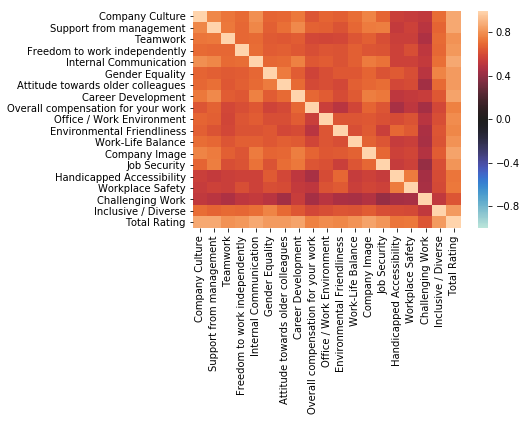

In [ ]:
sns.heatmap(rev_corr, vmin = -1,  center = 0)

In [ ]:
rev_corr.where(rev_corr<1)

,Company Culture,Support from management,Teamwork,Freedom to work independently,Internal Communication,Gender Equality,Attitude towards older colleagues,Career Development,Overall compensation for your work,Office / Work Environment,Environmental Friendliness,Work-Life Balance,Company Image,Job Security,Handicapped Accessibility,Workplace Safety,Challenging Work,Inclusive / Diverse,Total Rating
Company Culture,NaN,0.777838,0.731099,0.700744,0.797699,0.685378,0.691449,0.735777,0.634842,0.680229,0.668371,0.710257,0.765729,0.685695,0.561334,0.541813,0.530873,0.705170,0.870951
Support from management,0.777838,NaN,0.737233,0.691725,0.780593,0.671232,0.717809,0.785591,0.674512,0.670085,0.630659,0.693508,0.744385,0.753376,0.537411,0.563073,0.503389,0.687491,0.874450
Teamwork,0.731099,0.737233,NaN,0.688444,0.696900,0.650112,0.643798,0.658118,0.592420,0.581463,0.592994,0.635047,0.668738,0.615202,0.559716,0.562367,0.475474,0.701820,0.812170
Freedom to work independently,0.700744,0.691725,0.688444,NaN,0.706993,0.661135,0.670347,0.644734,0.609566,0.633848,0.627526,0.669631,0.637140,0.632151,0.568642,0.613244,0.519633,0.688724,0.823180
Internal Communication,0.797699,0.780593,0.696900,0.706993,NaN,0.695051,0.696768,0.762712,0.645660,0.657696,0.631016,0.669012,0.748887,0.720625,0.563404,0.562502,0.537475,0.718347,0.870232
Gender Equality,0.685378,0.671232,0.650112,0.661135,0.695051,NaN,0.749709,0.662263,0.575731,0.610607,0.648290,0.641540,0.686664,0.629322,0.651344,0.609406,0.504575,0.771764,0.832086
Attitude towards older colleagues,0.691449,0.717809,0.643798,0.670347,0.696768,0.749709,NaN,0.696353,0.601195,0.614684,0.590168,0.669488,0.688393,0.710214,0.587461,0.609115,0.439963,0.697632,0.833789
Career Development,0.735777,0.785591,0.658118,0.644734,0.762712,0.662263,0.696353,NaN,0.690445,0.660661,0.604135,0.654610,0.750524,0.736543,0.520569,0.538399,0.553559,0.646460,0.852318
Overall compensation for your work,0.634842,0.674512,0.592420,0.609566,0.645660,0.575731,0.601195,0.690445,NaN,0.556985,0.502447,0.581548,0.682612,0.639266,0.460090,0.516239,0.449943,0.589799,0.760686
Office / Work Environment,0.680229,0.670085,0.581463,0.633848,0.657696,0.610607,0.614684,0.660661,0.556985,NaN,0.639189,0.637876,0.647843,0.619966,0.605271,0.628040,0.500929,0.611578,0.794366


In [ ]:
rev_t = (rev_corr*((drop4.shape[0]-2)**0.5))/((1-(rev_corr**2))**0.5) 

In [ ]:
rev_corr.where(abs(rev_t)>1.98 ).dropna(how = 'all').dropna(how = 'all', axis = 1)

,Company Culture,Support from management,Teamwork,Freedom to work independently,Internal Communication,Gender Equality,Attitude towards older colleagues,Career Development,Overall compensation for your work,Office / Work Environment,Environmental Friendliness,Work-Life Balance,Company Image,Job Security,Handicapped Accessibility,Workplace Safety,Challenging Work,Inclusive / Diverse,Total Rating
Company Culture,1.000000,0.777838,0.731099,0.700744,0.797699,0.685378,0.691449,0.735777,0.634842,0.680229,0.668371,0.710257,0.765729,0.685695,0.561334,0.541813,0.530873,0.705170,0.870951
Support from management,0.777838,1.000000,0.737233,0.691725,0.780593,0.671232,0.717809,0.785591,0.674512,0.670085,0.630659,0.693508,0.744385,0.753376,0.537411,0.563073,0.503389,0.687491,0.874450
Teamwork,0.731099,0.737233,1.000000,0.688444,0.696900,0.650112,0.643798,0.658118,0.592420,0.581463,0.592994,0.635047,0.668738,0.615202,0.559716,0.562367,0.475474,0.701820,0.812170
Freedom to work independently,0.700744,0.691725,0.688444,1.000000,0.706993,0.661135,0.670347,0.644734,0.609566,0.633848,0.627526,0.669631,0.637140,0.632151,0.568642,0.613244,0.519633,0.688724,0.823180
Internal Communication,0.797699,0.780593,0.696900,0.706993,1.000000,0.695051,0.696768,0.762712,0.645660,0.657696,0.631016,0.669012,0.748887,0.720625,0.563404,0.562502,0.537475,0.718347,0.870232
Gender Equality,0.685378,0.671232,0.650112,0.661135,0.695051,1.000000,0.749709,0.662263,0.575731,0.610607,0.648290,0.641540,0.686664,0.629322,0.651344,0.609406,0.504575,0.771764,0.832086
Attitude towards older colleagues,0.691449,0.717809,0.643798,0.670347,0.696768,0.749709,1.000000,0.696353,0.601195,0.614684,0.590168,0.669488,0.688393,0.710214,0.587461,0.609115,0.439963,0.697632,0.833789
Career Development,0.735777,0.785591,0.658118,0.644734,0.762712,0.662263,0.696353,1.000000,0.690445,0.660661,0.604135,0.654610,0.750524,0.736543,0.520569,0.538399,0.553559,0.646460,0.852318
Overall compensation for your work,0.634842,0.674512,0.592420,0.609566,0.645660,0.575731,0.601195,0.690445,1.000000,0.556985,0.502447,0.581548,0.682612,0.639266,0.460090,0.516239,0.449943,0.589799,0.760686
Office / Work Environment,0.680229,0.670085,0.581463,0.633848,0.657696,0.610607,0.614684,0.660661,0.556985,1.000000,0.639189,0.637876,0.647843,0.619966,0.605271,0.628040,0.500929,0.611578,0.794366


In [ ]:
drop4.corr().where(drop4.corr()<1).min().min()

0.4123156794968512

In [ ]:
drop4.corr().drop('Total Rating').drop('Total Rating', axis = 1).where(drop4.corr()<1).max().max() #Observing maximum non-total rating correlation

0.7976989517203561

In [ ]:
drop4.corr().drop('Total Rating').drop('Total Rating', axis = 1).where(drop4.corr()<1).mean()      #Observing mean non_total rating correlation

Company Culture                       0.682606
Support from management               0.683524
Teamwork                              0.634761
Freedom to work independently         0.644955
Internal Communication                0.681844
Gender Equality                       0.653184
Attitude towards older colleagues     0.651444
Career Development                    0.664791
Overall compensation for your work    0.588429
Office / Work Environment             0.620997
Environmental Friendliness            0.611886
Work-Life Balance                     0.627842
Company Image                         0.666494
Job Security                          0.633491
Handicapped Accessibility             0.574323
Workplace Safety                      0.582259
Challenging Work                      0.486345
Inclusive / Diverse                   0.652818
dtype: float64

### Inspecting scatter plots to find best graphical representation

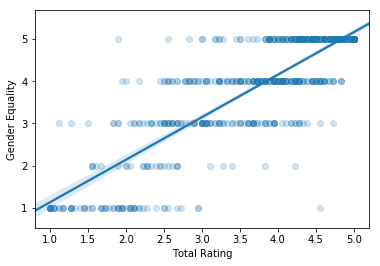

In [ ]:
ax_reviews = sns.regplot(x="Total Rating", y="Gender Equality",  data=drop4,  scatter_kws = {'alpha': 0.2})

### Graphs below show large issue with venue data set

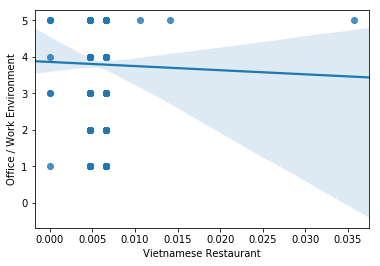

In [ ]:
sns.regplot(x="Vietnamese Restaurant", y="Office / Work Environment",  data=combo_rate)

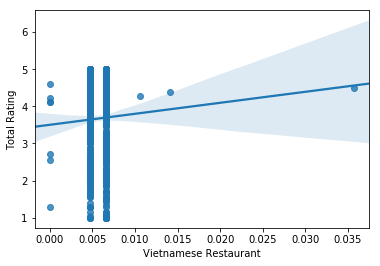

In [ ]:
sns.regplot(x="Vietnamese Restaurant", y="Total Rating",  data=combo_rate) 

### Observe standard deviation and mean by column

In [ ]:
drop4.std()

Company Culture                       1.365674
Support from management               1.470941
Teamwork                              1.275178
Freedom to work independently         1.311828
Internal Communication                1.352977
Gender Equality                       1.293954
Attitude towards older colleagues     1.378050
Career Development                    1.445709
Overall compensation for your work    1.326261
Office / Work Environment             1.301586
Environmental Friendliness            1.256403
Work-Life Balance                     1.350553
Company Image                         1.364372
Job Security                          1.492282
Handicapped Accessibility             1.145373
Workplace Safety                      1.075504
Challenging Work                      1.184703
Inclusive / Diverse                   1.317101
Total Rating                          1.066633
dtype: float64

In [ ]:
drop4.mean()

Company Culture                       3.603318
Support from management               3.453997
Teamwork                              3.702866
Freedom to work independently         3.692308
Internal Communication                3.390649
Gender Equality                       3.828054
Attitude towards older colleagues     3.613876
Career Development                    3.325792
Overall compensation for your work    3.544495
Office / Work Environment             3.796380
Environmental Friendliness            3.822021
Work-Life Balance                     3.624434
Company Image                         3.671192
Job Security                          3.319759
Handicapped Accessibility             4.061840
Workplace Safety                      4.170437
Challenging Work                      3.728507
Inclusive / Diverse                   3.778281
Total Rating                          3.673789
dtype: float64

In [ ]:
drop4.shape

(663, 21)

### Look at Rating data organized by city 

In [ ]:
drop4.groupby('Company').describe()

Company Culture                                              \
                  count     mean       std  min  25%  50%  75%  max   
Company                                                               
Dell              367.0  3.67030  1.329680  1.0  3.0  4.0  5.0  5.0   
Oracle            296.0  3.52027  1.406858  1.0  3.0  4.0  5.0  5.0   

        Support from management            ... Inclusive / Diverse       \
                          count      mean  ...                 75%  max   
Company                                    ...                            
Dell                      367.0  3.427793  ...                 5.0  5.0   
Oracle                    296.0  3.486486  ...                 5.0  5.0   

        Total Rating                                                         \
               count      mean       std  min       25%       50%       75%   
Company                                                                       
Dell           367.0  3.684983  1.080791  1.0  3.000000  3.944444  4.500000   
Oracle         296.0  3.659910  1.050472  1.0  2.888889  4.000000  4.458333   

              
         max  
Company       
Dell     5.0  
Oracle   5.0  

[2 rows x 152 columns]

In [ ]:
drop4.groupby('City').mean().where(drop4.groupby('City').count() >5).dropna()

,Company Culture,Support from management,Teamwork,Freedom to work independently,Internal Communication,Gender Equality,Attitude towards older colleagues,Career Development,Overall compensation for your work,Office / Work Environment,Environmental Friendliness,Work-Life Balance,Company Image,Job Security,Handicapped Accessibility,Workplace Safety,Challenging Work,Inclusive / Diverse,Total Rating
City,,,,,,,,,,,,,,,,,,,
Atlanta,3.111111,2.222222,3.000000,3.222222,2.666667,3.222222,2.444444,2.444444,3.444444,3.333333,3.444444,2.666667,2.666667,2.222222,3.444444,3.666667,3.333333,2.888889,2.969136
Austin,3.734694,3.591837,3.653061,3.836735,3.693878,3.918367,3.469388,3.530612,3.816327,3.612245,3.897959,3.693878,3.816327,3.224490,4.224490,4.244898,4.000000,3.938776,3.772109
Boston,4.131579,4.052632,3.921053,3.973684,3.842105,4.368421,3.973684,3.710526,3.815789,4.078947,4.184211,4.052632,4.157895,3.921053,4.368421,4.368421,3.921053,4.105263,4.052632
Broomfield,2.900000,2.700000,3.600000,3.300000,2.500000,2.900000,2.600000,2.600000,3.000000,3.400000,3.300000,3.200000,2.600000,2.500000,4.100000,4.000000,3.600000,3.300000,3.116667
Burlington,3.653846,3.653846,3.846154,3.615385,3.461538,4.192308,3.884615,3.615385,3.653846,4.384615,3.961538,3.769231,3.615385,3.576923,4.269231,4.346154,3.807692,3.807692,3.839744
Chicago,4.375000,4.250000,4.125000,4.375000,4.000000,4.500000,4.250000,4.125000,4.125000,4.250000,4.125000,3.375000,4.375000,4.000000,4.000000,4.375000,4.000000,4.375000,4.166667
Dallas,3.500000,3.500000,3.500000,3.250000,3.625000,4.000000,3.750000,3.375000,3.625000,3.750000,3.500000,3.375000,3.875000,3.250000,3.375000,3.875000,3.625000,3.875000,3.590278
Denver,3.588235,3.470588,3.705882,3.529412,3.352941,3.764706,3.588235,2.411765,3.529412,3.705882,3.882353,3.764706,3.647059,3.411765,4.176471,4.294118,2.176471,3.823529,3.545752
Franklin,4.250000,3.500000,4.100000,4.050000,3.850000,4.350000,4.150000,4.100000,4.000000,4.100000,3.800000,4.200000,4.300000,3.900000,4.200000,4.250000,4.250000,4.150000,4.083333


### Locating all cities to see the general trend, using only those with sample of at least 5 reviews based in the city

In [ ]:
city_mean = drop4.groupby('City').mean().where(drop4.groupby('City').count() >5).dropna()

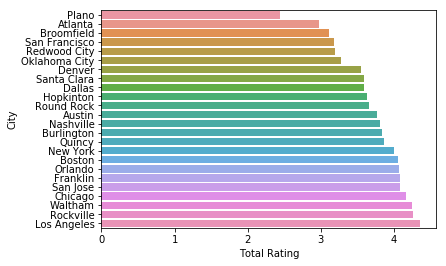

In [ ]:
city_plot = sns.barplot(y = city_mean.sort_values(by = ['Total Rating']).index, x = 'Total Rating', data = city_mean.sort_values(by = ['Total Rating']), orient = 'h')

### By creating uniform sampling, the idea is to judge cities to each other. Using cities with higher samples prevents outliers of possible one off cities that do not have enough data to trend.

### A One-way ANOVA test is used to determine any significance between cities. 

In [ ]:
drop4.groupby('City').count().max(axis = 1).sort_values(ascending = False).head().index

Index(['Redwood City', 'Round Rock', 'Austin', 'Hopkinton', 'Boston'], dtype='object', name='City')

In [ ]:
drop4.groupby('City').count().max(axis = 1).sort_values(ascending = False).head()

City
Redwood City    57
Round Rock      51
Austin          49
Hopkinton       46
Boston          38
dtype: int64

In [ ]:
total_mean = drop4['Total Rating'].mean()
total_mean

3.673789173789173

In [ ]:
city_frame = drop4[['City', 'Total Rating']]
city_frame.head()

,City,Total Rating
0,Chicago,4.388889
1,Broomfield,4.111111
2,Seattle Heights,4.222222
3,Orlando,1.277778
4,Redwood Shores,4.500000


In [ ]:
city_pivot = drop4.pivot(values = 'Total Rating', columns = 'City').loc[:,city_mean.index]
city_pivot.dropna(how = 'all', inplace= True)

In [ ]:
num_pivot = city_pivot.T.to_numpy(copy = True)

In [ ]:
num_pivot.shape

(24, 466)

In [ ]:
hop = city_pivot['Hopkinton'].dropna().sample(30, random_state = 1)

In [ ]:
redw = city_pivot['Redwood City'].dropna().sample(30, random_state=1)

In [ ]:
rndrk = city_pivot['Round Rock'].dropna().sample(30, random_state=1)

In [ ]:
aus = city_pivot['Austin'].dropna().sample(30, random_state=1)

In [ ]:
bos = city_pivot['Boston'].dropna().sample(30, random_state=1)

In [ ]:
contr = drop4['Total Rating'].sample(30, random_state=1)

In [ ]:
drop4.groupby('City').count().max(axis = 1).sort_values(ascending = False).head().index

Index(['Redwood City', 'Round Rock', 'Austin', 'Hopkinton', 'Boston'], dtype='object', name='City')

looking for p < 0.01 

In [ ]:
stats.f_oneway(redw,rndrk,hop,aus,bos)

F_onewayResult(statistic=4.402805536874611, pvalue=0.002176739113342448)

In [ ]:
stats.f_oneway(redw,rndrk,hop,aus,bos, contr)

F_onewayResult(statistic=3.484799414657513, pvalue=0.005004790444158984)

### A significant difference in within the data, individual T test are used to determine what significance there is

In [ ]:
sample_list = [['Redwood City', redw],['Round Rock', rndrk],['Hopkinton', hop],['Austin', aus],['Boston', bos],['Control', contr]]

In [ ]:
t_copy = sample_list.copy()
for sample in range(len(sample_list)):
    t_base = t_copy.pop()
    for alt_sample in t_copy:
        print ('T Test of {} and {}'.format(t_base[0],alt_sample[0]))
        t_stat, p_val=stats.ttest_ind(t_base[1], alt_sample[1])
        print('T stat:{} | p value:{}\n'.format(t_stat,p_val))

T Test of Control and Redwood City
T stat:1.4324566806849703 | p value:0.15738101570803595

T Test of Control and Round Rock
T stat:1.211544427714907 | p value:0.23059983745745344

T Test of Control and Hopkinton
T stat:0.93328839714137 | p value:0.3545402278895591

T Test of Control and Austin
T stat:0.21137149370399305 | p value:0.8333383541872591

T Test of Control and Boston
T stat:-2.3570057412241305 | p value:0.021820001855264153

T Test of Boston and Redwood City
T stat:4.091861528158365 | p value:0.00013389112020389485

T Test of Boston and Round Rock
T stat:3.683488951083996 | p value:0.0005071583792269315

T Test of Boston and Hopkinton
T stat:3.3272785221124845 | p value:0.0015265784531563588

T Test of Boston and Austin
T stat:3.144869631095823 | p value:0.0026202352104370357

T Test of Austin and Redwood City
T stat:1.4006354736946391 | p value:0.16665054531591295

T Test of Austin and Round Rock
T stat:1.1494889113661757 | p value:0.25507245053048244

T Test of Austin and

### Boston is determined different by way of multiple T tests, but this is likely improper post hoc methodology. Use of tukeyHSD is likely to generate an imporved and less error prone result.  Further iterations will improve on this  

In [ ]:
bos.mean()

4.246296296296297

In [ ]:
rndrk.mean()

3.3388888888888895

In [ ]:
hop.mean()

3.42037037037037

In [ ]:
bos.mean()-rndrk.mean()

0.9074074074074074

In [ ]:
(bos.mean()-rndrk.mean())/5

0.1814814814814815

In [ ]:
bos.mean()-hop.mean()

0.8259259259259268

In [ ]:
(bos.mean()-hop.mean())/5

0.16518518518518538

### Use of sort value to identify none integer data is used. The top 9 venue types that are significant by COUNT are selected, as well as vegan/veggie due to the information from previous iterations. Analysis of data should be restricted to the same data set to maintain consistancy

In [ ]:
test.dtypes.sort_values()

Radius                             int64
Count                              int64
Noodle House                     float64
Office                           float64
Opera House                      float64
Optical Shop                     float64
Other Great Outdoors             float64
Other Nightlife                  float64
Paper / Office Supplies Store    float64
Park                             float64
Pet Store                        float64
Pharmacy                         float64
Pilates Studio                   float64
Pizza Place                      float64
Playground                       float64
Plaza                            float64
Poke Place                       float64
Pool Hall                        float64
Nightclub                        float64
New American Restaurant          float64
Accessories Store                float64
Music Store                      float64
Kebab Restaurant                 float64
Kids Store                       float64
Korean Restauran

In [ ]:
test.columns.drop(['City', 'Company', 'Address'])

Index(['Accessories Store', 'Airport Terminal', 'American Restaurant',
       'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports',
       'Auditorium', 'Automotive Shop', 'BBQ Joint', 'Bagel Shop',
       ...
       'Tunnel', 'Used Bookstore', 'Vegetarian / Vegan Restaurant',
       'Video Store', 'Vietnamese Restaurant', 'Wine Bar', 'Wine Shop',
       'Wings Joint', 'Women's Store', 'Yoga Studio'],
      dtype='object', length=165)

In [ ]:
sig_ven = list(sig_ven) + ['Vegetarian / Vegan Restaurant']

# Regression Model
### Data is split into test and train portions and then models in a variety of matters using the 10 venues selected and Total Rating data. Modelling uses multiple regression and polynomial regression. 

Beware- Polynomial Regression on the notbook has taken significant time

In [ ]:
X = np.asarray(combo_rate[sig_ven])
y = np.asarray(combo_rate['Total Rating'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (530, 10) (530,)
Test set: (133, 10) (133,)


In [ ]:
m_regr = linear_model.LinearRegression()
m_regr.fit(X_train, y_train)
print('Coefficients: ', m_regr.coef_)

Coefficients:  [ 8.17669032e+00 -3.72642633e+14  8.63553454e+14 -2.43813061e+14
 -2.73684998e+01  4.20403856e+14  4.20403856e+14  4.20403856e+14
 -1.88423666e+15 -7.58311550e+01]


In [ ]:
y_hat= m_regr.predict(X_test)
print("Residual sum of squares: %.2f" % np.mean((y_hat - y_test) ** 2))
print('Variance score: %.2f' % m_regr.score(X, y))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))

Residual sum of squares: 1.30
Variance score: 0.01
Mean absolute error: 0.95


In [ ]:
### Warning, these regression algorithms may take a long time to process due to memory use


for dop in range(5):
    print('\nDegree of regression: '+str(dop))
    p_regr = PolynomialFeatures(degree = dop)
    X_train_poly = p_regr.fit_transform(X_train)
    pm_regr = linear_model.LinearRegression()
    pm_regr.fit(X_train_poly, y_train)
    X_test_poly = p_regr.fit_transform(X_test)
    y_hat= pm_regr.predict(X_test_poly)
    print("Residual sum of squares: %.2f" % np.mean((y_hat - y_test) ** 2))
    print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
    print("R2-score: %.2f" % r2_score(y_hat, y_test) )


Degree of regression: 0
Residual sum of squares: 1.31
Mean absolute error: 0.96
R2-score: 0.00

Degree of regression: 1
Residual sum of squares: 1.30
Mean absolute error: 0.96
R2-score: -644.66

Degree of regression: 2
Residual sum of squares: 1.31
Mean absolute error: 0.97
R2-score: -157.37

Degree of regression: 3
Residual sum of squares: 1.32
Mean absolute error: 0.96
R2-score: -188.26

Degree of regression: 4
